点图通过点的位置来估计数值变量的集中趋势，当关注一个或多个分类变量不同级别之间的趋势变化时，点图是比柱状图更好的选择

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

In [46]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


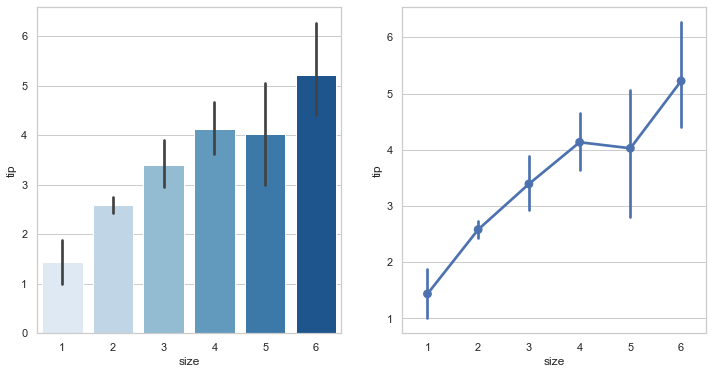

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.barplot(x='size', y='tip', data=tips, palette='Blues')

plt.subplot(122)
sns.pointplot(x='size', y='tip', data=tips)

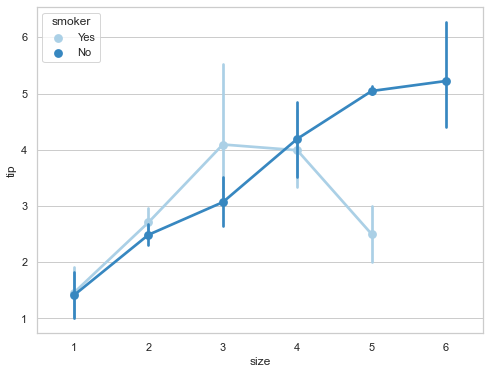

In [7]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='size', y='tip', data=tips, hue='smoker', palette='Blues')

In [24]:
tips.loc[tips['smoker'] == 'Yes'][['size', 'tip']].round(2).sort_values('size').groupby('size').mean()

,tip
size,
1,1.460000
2,2.709545
3,4.095000
4,3.992727
5,2.500000


In [28]:
tips.loc[tips['smoker'] == 'No'][['size', 'tip']].round(2).sort_values('size').groupby('size').mean()

,tip
size,
1,1.415000
2,2.489000
3,3.069231
4,4.195769
5,5.046667
6,5.225000


In [32]:
tips[['smoker', 'size', 'tip']].groupby(['smoker', 'size']).mean().round(2)

tip
smoker size      
Yes    1     1.46
       2     2.71
       3     4.10
       4     3.99
       5     2.50
       6      NaN
No     1     1.42
       2     2.49
       3     3.07
       4     4.20
       5     5.05
       6     5.22

将估计量改为$sum$

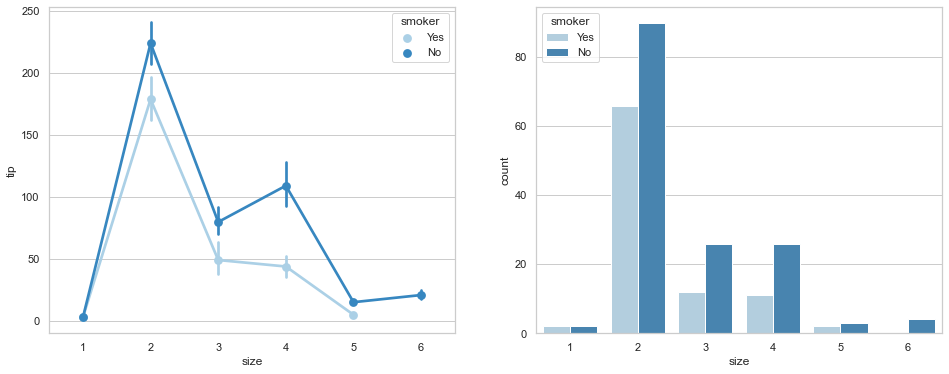

In [33]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
sns.pointplot(x='size', y='tip', data=tips, hue='smoker', estimator=sum, palette='Blues')

plt.subplot(122)
sns.countplot(x='size', data=tips, hue='smoker', palette='Blues')

In [39]:
tips[['smoker', 'size', 'tip']].groupby(['smoker', 'size']).sum().round(2)

tip
smoker size        
Yes    1       2.92
       2     178.83
       3      49.14
       4      43.92
       5       5.00
       6        NaN
No     1       2.83
       2     224.01
       3      79.80
       4     109.09
       5      15.14
       6      20.90

In [50]:
tips[['smoker', 'size', 'tip']].groupby(['smoker', 'size']).count().round(2).unstack(level='smoker')

tip      
smoker   Yes    No
size              
1        2.0   2.0
2       66.0  90.0
3       12.0  26.0
4       11.0  26.0
5        2.0   3.0
6        NaN   4.0

In [51]:
tips.groupby(['smoker', 'size']).count().round(2).unstack(level='smoker')

total_bill         tip         sex         day        time      
smoker        Yes    No   Yes    No   Yes    No   Yes    No   Yes    No
size                                                                   
1             2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0
2            66.0  90.0  66.0  90.0  66.0  90.0  66.0  90.0  66.0  90.0
3            12.0  26.0  12.0  26.0  12.0  26.0  12.0  26.0  12.0  26.0
4            11.0  26.0  11.0  26.0  11.0  26.0  11.0  26.0  11.0  26.0
5             2.0   3.0   2.0   3.0   2.0   3.0   2.0   3.0   2.0   3.0
6             NaN   4.0   NaN   4.0   NaN   4.0   NaN   4.0   NaN   4.0